In [46]:
import pandas as pd 
from openpyxl import load_workbook
from IPython.display import Image
from sklearn.preprocessing import Imputer
from sklearn import tree
from subprocess import check_call
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [47]:
wb = load_workbook(filename = 'siswa3.xlsx') #nama file excel dan sheet yang digunakan
sheet_ranges = wb['Sheet1'] #jumlah sheet

df = pd.DataFrame(sheet_ranges.values)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,No,No_Induk,Nama,jen_kel,alamat,Agama,Tgl_Lahir,Tmpt_Lahir,Nama_Wali,Pekerjaan Wali,Pend,Alamat_Wali,Thn_msk,Usia_msk,lulus,UAS,predikat,Pend_SebelumSD,None
1,1,2683,Ani Yuanita,P,Tegallayang,Islam,1993-11-03 00:00:00,Bantul,Sukarjo,Petani,SD,Tegallayang,2000,7,2007,17.9,Cukup,TK,None
2,2,2686,Burhan Fajar P.,L,Tegallayang,Islam,1993-12-29 00:00:00,Bantul,Hadi Wardoyo,Petani,SMA,Tegallayang,2000,7,2007,16.9,Cukup,TK,None
3,3,2688,Heri Budiyanto,L,Tegallayang,Islam,1994-02-15 00:00:00,Bantul,Ribut,Petani,None,Tegallayang,2000,6,2007,20.15,Cukup,TK,None
4,4,2700,Dimas Satrio W.,L,Tegallayang,Islam,1994-04-20 00:00:00,Bantul,FX Slamet Sudarsono,PNS,PT,Tegallayang,2001,7,2007,18.35,Cukup,TK,None
5,5,2701,Nur Hidayat,L,Tegallayang,Islam,1994-06-12 00:00:00,Kuningan,Ofan,Wiraswasta,SLTP,Tegallayang,2001,7,2007,26.1,Baik,TK,None
6,6,2702,Vilda Lestari,P,Tegallayang,Islam,1994-06-25 00:00:00,Bantul,Rochmadi,Petani,SLTP,Tegallayang,2001,7,2007,13.6,Kurang,TK,None
7,7,2703,Edi Suryanto,L,Tegallayang,Islam,1994-07-06 00:00:00,Bantul,Sukiman,Petani,SD,Tegallayang,2001,7,2007,22.65,Baik,TK,None
8,8,2705,Erna Dwi Puspita,P,Tegallayang,Islam,1994-09-12 00:00:00,Bantul,Sumarjo,Wiraswasta,SD,Tegallayang,2001,7,2007,18.05,Cukup,TK,None
9,9,2706,Nurfita FF,P,Daguran,Islam,1994-10-04 00:00:00,Bantul,Giyana,Wiraswasta,SD,Tegallayang,2001,7,2007,16.15,Cukup,TK,None


In [48]:
d = df[1:50][[12,13,14,15,16]] #jumlah kolom dari dataframe yang akan di klasifikasi

d.columns = ['TAHUN MASUK', 'USIA MASUK', 'TAHUN LULUS', 'UAS', 'PREDIKAT'] #nama tabel yang akan digunakan
d = d.dropna(axis=0, how='any') #data none dihapus
d

,TAHUN MASUK,USIA MASUK,TAHUN LULUS,UAS,PREDIKAT
1,2000,7,2007,17.9,Cukup
2,2000,7,2007,16.9,Cukup
3,2000,6,2007,20.15,Cukup
4,2001,7,2007,18.35,Cukup
5,2001,7,2007,26.1,Baik
6,2001,7,2007,13.6,Kurang
7,2001,7,2007,22.65,Baik
8,2001,7,2007,18.05,Cukup
9,2001,7,2007,16.15,Cukup
10,2001,7,2007,26.9,Baik


In [49]:
for index, row in d.iterrows(): #format untuk data pada kolom yang akan dilakukan cluster
    d.ix[index,'MASA STUDI'] = row['TAHUN LULUS'] - row['TAHUN MASUK']
    d.ix[index,'UMUR'] = row['USIA MASUK'] + (row['TAHUN LULUS'] - row['TAHUN MASUK'])

d['UAS'] = d['UAS'].apply(str)

d['UAS'] = d['UAS'].str.replace(',','.').apply(float)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
print(d.dtypes) #digunakan untuk mengecek type data

TAHUN MASUK     object
USIA MASUK      object
TAHUN LULUS     object
UAS            float64
PREDIKAT        object
MASA STUDI     float64
UMUR           float64
dtype: object


In [51]:
d_train = d[['UAS', 'UMUR', 'MASA STUDI', 'PREDIKAT']].reset_index(drop=True) #Ubah index dataframe untuk memudahkan klasifikasi 
d_train

,UAS,UMUR,MASA STUDI,PREDIKAT
0,17.90,14.0,7.0,Cukup
1,16.90,14.0,7.0,Cukup
2,20.15,13.0,7.0,Cukup
3,18.35,13.0,6.0,Cukup
4,26.10,13.0,6.0,Baik
5,13.60,13.0,6.0,Kurang
6,22.65,13.0,6.0,Baik
7,18.05,13.0,6.0,Cukup
8,16.15,13.0,6.0,Cukup
9,26.90,13.0,6.0,Baik


In [52]:
for index, row in d_train.iterrows(): #class label klasifikasi untuk lama masa tunggu 
    if row['MASA STUDI'] >=2:
        d_train.ix[index, 'MASA TUNGGU'] = 'LAMA'
    elif row['MASA STUDI'] >=1:
         d_train.ix[index, 'MASA TUNGGU'] = 'SEDANG'
    else:
        d_train.ix[index, 'MASA TUNGGU'] = 'CEPAT'
    #menambahkan kolom Masa Studi denan keterangannya yaitu lama, sedang dan cepat

d_train

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,UAS,UMUR,MASA STUDI,PREDIKAT,MASA TUNGGU
0,17.90,14.0,7.0,Cukup,LAMA
1,16.90,14.0,7.0,Cukup,LAMA
2,20.15,13.0,7.0,Cukup,LAMA
3,18.35,13.0,6.0,Cukup,LAMA
4,26.10,13.0,6.0,Baik,LAMA
5,13.60,13.0,6.0,Kurang,LAMA
6,22.65,13.0,6.0,Baik,LAMA
7,18.05,13.0,6.0,Cukup,LAMA
8,16.15,13.0,6.0,Cukup,LAMA
9,26.90,13.0,6.0,Baik,LAMA


In [53]:
y = d_train["PREDIKAT"].values #Menentukan kolom yang digunakan sebagai class target atau label
y

array([u'Cukup', u'Cukup', u'Cukup', u'Cukup', u'Baik', u'Kurang',
       u'Baik', u'Cukup', u'Cukup', u'Baik', u'Cukup', u'Baik', u'Baik',
       u'Baik', u'Baik', u'Baik', u'Baik', u'Baik', u'Baik', u'Baik',
       u'Baik', u'Cukup', u'Cukup', u'Cukup', u'Cukup', u'Baik', u'Cukup',
       u'Baik', u'Baik', u'Baik', u'Baik', u'Baik', u'Baik', u'Baik',
       u'Baik', u'Baik', u'Baik', u'Baik', u'Baik', u'Cukup', u'Baik',
       u'Baik', u'Baik', u'Cukup', u'Baik', u'Cukup', u'Baik', u'Cukup',
       u'Baik'], dtype=object)

In [54]:
columns = ['UMUR','UAS','MASA STUDI'] #Menentukan kolom yang digunakan sebagai fitur, umur digunakan sebagai fitur untuk klasifikasi
features = d_train[list(columns)].values
features

array([[14.  , 17.9 ,  7.  ],
       [14.  , 16.9 ,  7.  ],
       [13.  , 20.15,  7.  ],
       [13.  , 18.35,  6.  ],
       [13.  , 26.1 ,  6.  ],
       [13.  , 13.6 ,  6.  ],
       [13.  , 22.65,  6.  ],
       [13.  , 18.05,  6.  ],
       [13.  , 16.15,  6.  ],
       [13.  , 26.9 ,  6.  ],
       [13.  , 20.95,  6.  ],
       [13.  , 25.25,  6.  ],
       [13.  , 25.45,  6.  ],
       [13.  , 28.85,  6.  ],
       [12.  , 25.4 ,  6.  ],
       [12.  , 25.1 ,  6.  ],
       [12.  , 24.2 ,  6.  ],
       [12.  , 26.6 ,  6.  ],
       [12.  , 27.15,  6.  ],
       [12.  , 26.5 ,  6.  ],
       [12.  , 24.6 ,  6.  ],
       [12.  , 20.5 ,  6.  ],
       [12.  , 18.45,  6.  ],
       [15.  , 18.3 ,  8.  ],
       [14.  , 16.45,  7.  ],
       [13.  , 23.2 ,  7.  ],
       [13.  , 18.75,  7.  ],
       [13.  , 23.1 ,  6.  ],
       [13.  , 21.85,  6.  ],
       [13.  , 23.2 ,  6.  ],
       [12.  , 22.95,  6.  ],
       [12.  , 23.15,  6.  ],
       [12.  , 22.25,  6.  ],
       [12

In [55]:
imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0) # fungsi ini mengganti nilai NaN dengan nilai ratarata kolom 
 
x = imp.fit_transform(features)
x

array([[14.  , 17.9 ,  7.  ],
       [14.  , 16.9 ,  7.  ],
       [13.  , 20.15,  7.  ],
       [13.  , 18.35,  6.  ],
       [13.  , 26.1 ,  6.  ],
       [13.  , 13.6 ,  6.  ],
       [13.  , 22.65,  6.  ],
       [13.  , 18.05,  6.  ],
       [13.  , 16.15,  6.  ],
       [13.  , 26.9 ,  6.  ],
       [13.  , 20.95,  6.  ],
       [13.  , 25.25,  6.  ],
       [13.  , 25.45,  6.  ],
       [13.  , 28.85,  6.  ],
       [12.  , 25.4 ,  6.  ],
       [12.  , 25.1 ,  6.  ],
       [12.  , 24.2 ,  6.  ],
       [12.  , 26.6 ,  6.  ],
       [12.  , 27.15,  6.  ],
       [12.  , 26.5 ,  6.  ],
       [12.  , 24.6 ,  6.  ],
       [12.  , 20.5 ,  6.  ],
       [12.  , 18.45,  6.  ],
       [15.  , 18.3 ,  8.  ],
       [14.  , 16.45,  7.  ],
       [13.  , 23.2 ,  7.  ],
       [13.  , 18.75,  7.  ],
       [13.  , 23.1 ,  6.  ],
       [13.  , 21.85,  6.  ],
       [13.  , 23.2 ,  6.  ],
       [12.  , 22.95,  6.  ],
       [12.  , 23.15,  6.  ],
       [12.  , 22.25,  6.  ],
       [12

In [56]:
clf = tree.DecisionTreeClassifier(criterion="entropy") #memanggil decision tree, mengukur kualitas split
clf = clf.fit(x,y) #membuat model klasifikasi dan meyimpan variabel

In [57]:
with open("Pohon.dot",'w') as f: #Menerapkan decision tree dalam bentuk graph
    f = tree.export_graphviz (clf, out_file=f, #menyimpna model atau variabel
                              feature_names=columns,
                              class_names=y, filled=True, #menyimpan nama kolom , class, dan memberikan warna node
                              rounded=True, special_characters=True)

In [58]:
check_call(['dot','-Tpng','Pohon.dot','-o', 'Pohon.png']) #Mengkonversi file dari .dot ke .png. 

0

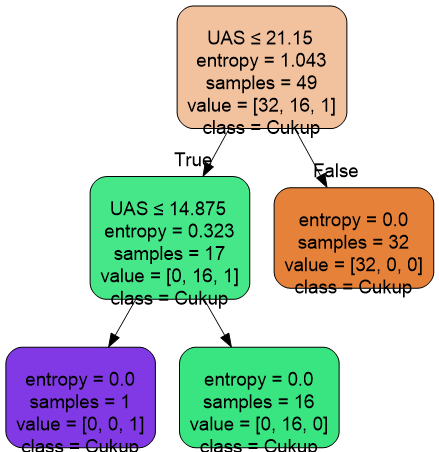

In [59]:
Image(filename='Pohon.png') #Menampilkan graph pohon keputusan